**Task: Seeking lines in edge image**

Write a python script/function, that finds lines along four dominant straight edges in the given image. The solution should consist of the following steps:

1. load an image,
2. compute set of locations of edge pixels using edge detector from opencv,
3. finds single line using RANSAC algorithm on the edge points,
4. remove the inliers of the line from the point set,
5. repeat for the other lines.

Finally, show the results.

Techniques to perform:

1. Do not use RANSAC from openCV
2. Can use open cv for edge detection.()
3. Function which uses image bounding box, minimum/maximum.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python-headless matplotlib

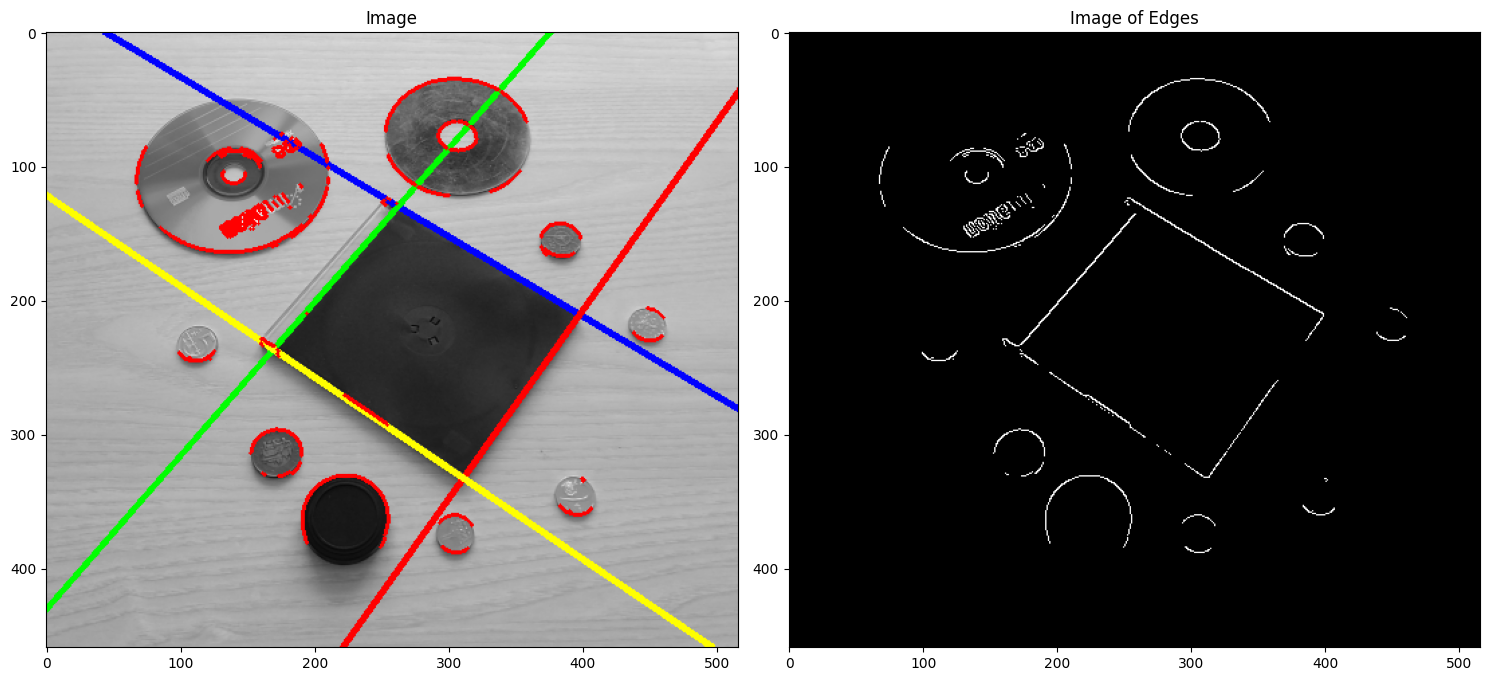

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detect_dominant_edges(image_path, num_lines=4, edge_threshold1=350, edge_threshold2=400, line_thickness=4):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Image not found.")
        return

    # Step 1: Edge detection using Canny
    edges = cv2.Canny(img, edge_threshold1, edge_threshold2)

    # Convert edge image to a list of coordinates
    edge_points = np.column_stack(np.where(edges > 0))

    # Prepare image for drawing lines and overlay -convert grayscale to BGR
    img_with_lines = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Function to calculate distance from a line for RANSAC
    def line_distance(point, line_params):
        a, b, c = line_params
        x, y = point
        return abs(a * x + b * y + c) / np.sqrt(a ** 2 + b ** 2)

    # RANSAC parameters
    ransac_iterations = 2000
    distance_threshold = 1.0
    line_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]  # Line colors

    # RANSAC line detection
    for i in range(num_lines):
        max_inliers = 0
        best_line = None
        best_inliers = None

        for _ in range(ransac_iterations):
            # Randomly sample two points
            indices = np.random.choice(len(edge_points), 2, replace=False)
            p1, p2 = edge_points[indices[0]], edge_points[indices[1]]

            # Fit line ax + by + c = 0
            a, b = p2[1] - p1[1], p1[0] - p2[0]
            c = -a * p1[0] - b * p1[1]
            line_params = (a, b, c)

            # Find inliers
            inliers = [pt for pt in edge_points if line_distance(pt, line_params) < distance_threshold]
            if len(inliers) > max_inliers:
                max_inliers = len(inliers)
                best_line = (p1, p2)
                best_inliers = inliers

        if best_line is not None:
            # Calculate extended line endpoints
            p1, p2 = best_line
            if p2[1] != p1[1]:  # Avoid division by zero
                slope = (p2[0] - p1[0]) / (p2[1] - p1[1])
                y1, y2 = 0, img.shape[0]
                x1 = int(p1[1] - p1[0] / slope)
                x2 = int(p2[1] + (img.shape[0] - p2[0]) / slope)
            else:
                x1, x2 = p1[1], p2[1]
                y1, y2 = 0, img.shape[0]

            # Draw the extended line
            cv2.line(img_with_lines, (x1, y1), (x2, y2), line_colors[i % len(line_colors)], line_thickness)

            # Remove inliers from edge points
            inliers_array = np.array(best_inliers)
            edge_points = np.array([pt for pt in edge_points if pt.tolist() not in inliers_array.tolist()])

    # Overlay edge points directly on the image with detected lines
    for pt in edge_points:
        cv2.circle(img_with_lines, (pt[1], pt[0]), 1, (0, 0, 255), -1)  # Red points for edge pixels

    # Display res
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Image with lines and edge points
    axes[0].imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image')
    axes[0].axis('on')

    # Edge map
    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title('Image of Edges')
    axes[1].axis('on')

    plt.tight_layout()
    plt.show()

image_path = "/content/drive/MyDrive/3DCV/cd_box.png"
detect_dominant_edges(image_path)


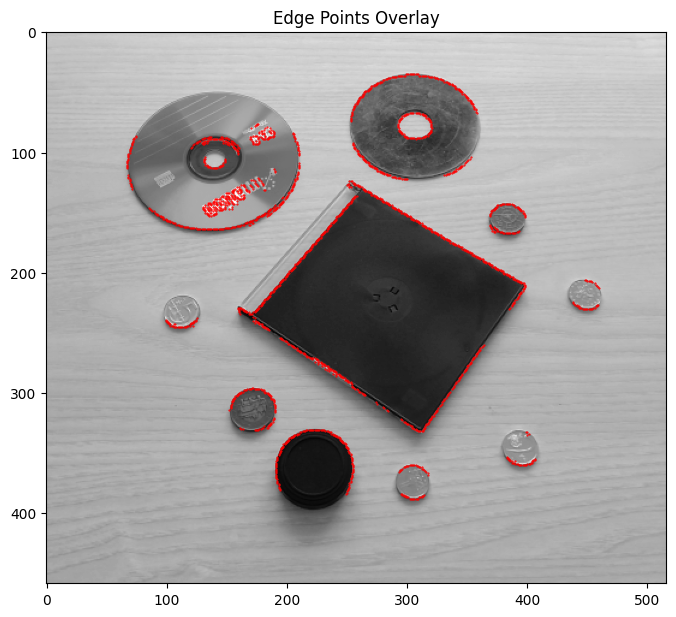

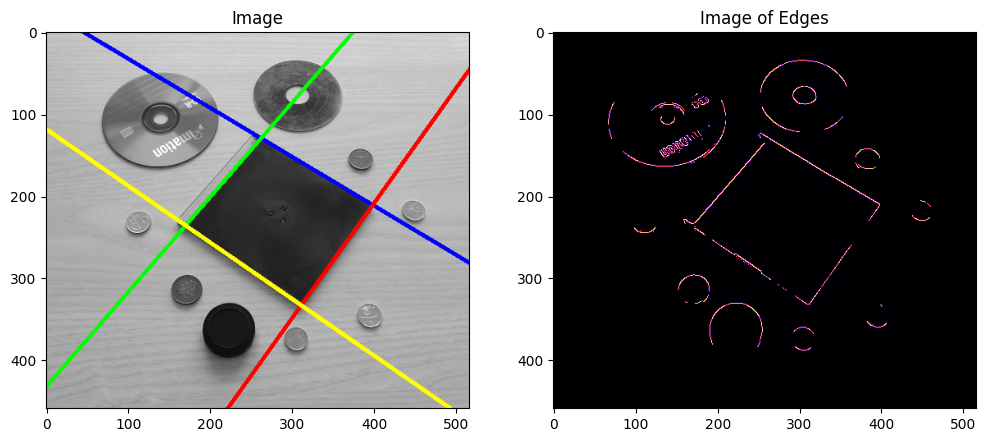

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detect_dominant_edges(image_path, num_lines=4, edge_threshold1=350, edge_threshold2=400, line_thickness=4):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Image not found.")
        return

    # Step 1: Edge detection using Canny
    edges = cv2.Canny(img, edge_threshold1, edge_threshold2)

    # Extract edge points using cv2.findNonZero (for visualization only)
    edge_points_visual = np.column_stack(np.where(edges > 0))

    # Visualize edge points overlayed on the original image
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray')
    plt.plot(edge_points_visual[:, 1], edge_points_visual[:, 0], 'r.', markersize=1)  # Red points
    plt.title("Edge Points Overlay")
    plt.axis('on')
    plt.show()

    # Step 2: Convert edge image to a list of coordinates for RANSAC
    edge_points = np.column_stack(np.where(edges > 0))  # Ensure input matches RANSAC logic

    # Prepare image for drawing lines (convert grayscale to BGR)
    img_with_lines = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Function to calculate distance from a line for RANSAC
    def line_distance(point, line_params):
        a, b, c = line_params
        x, y = point
        return abs(a * x + b * y + c) / np.sqrt(a ** 2 + b ** 2)

    # RANSAC parameters (your original logic kept intact)
    ransac_iterations = 2000
    distance_threshold = 1.0
    detected_lines = []  # Store detected lines
    line_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]  # Line colors

    # RANSAC line detection (exactly from your original code)
    for i in range(num_lines):
        max_inliers = 0
        best_line = None
        best_inliers = None

        for _ in range(ransac_iterations):
            # Randomly sample two points
            indices = np.random.choice(len(edge_points), 2, replace=False)
            p1, p2 = edge_points[indices[0]], edge_points[indices[1]]

            # Fit line ax + by + c = 0
            a, b = p2[1] - p1[1], p1[0] - p2[0]
            c = -a * p1[0] - b * p1[1]
            line_params = (a, b, c)

            # Find inliers
            inliers = [pt for pt in edge_points if line_distance(pt, line_params) < distance_threshold]
            if len(inliers) > max_inliers:
                max_inliers = len(inliers)
                best_line = (p1, p2)
                best_inliers = inliers

        if best_line is not None:
            # Calculate extended line endpoints
            p1, p2 = best_line
            if p2[1] != p1[1]:  # Avoid division by zero
                slope = (p2[0] - p1[0]) / (p2[1] - p1[1])
                y1, y2 = 0, img.shape[0]
                x1 = int(p1[1] - p1[0] / slope)
                x2 = int(p2[1] + (img.shape[0] - p2[0]) / slope)
            else:
                x1, x2 = p1[1], p2[1]
                y1, y2 = 0, img.shape[0]

            # Draw the extended line
            cv2.line(img_with_lines, (x1, y1), (x2, y2), line_colors[i % len(line_colors)], line_thickness)
            detected_lines.append(best_line)

            # Remove inliers from edge points
            inliers_array = np.array(best_inliers)
            edge_points = np.array([pt for pt in edge_points if pt.tolist() not in inliers_array.tolist()])

    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Image with detected lines
    ax[0].imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image')
    ax[0].axis('on')

    # Edge image
    ax[1].imshow(edges, cmap='magma')
    ax[1].set_title('Image of Edges')
    ax[1].axis('on')

    plt.show()

image_path = "/content/drive/MyDrive/3DCV/cd_box.png"
detect_dominant_edges(image_path)


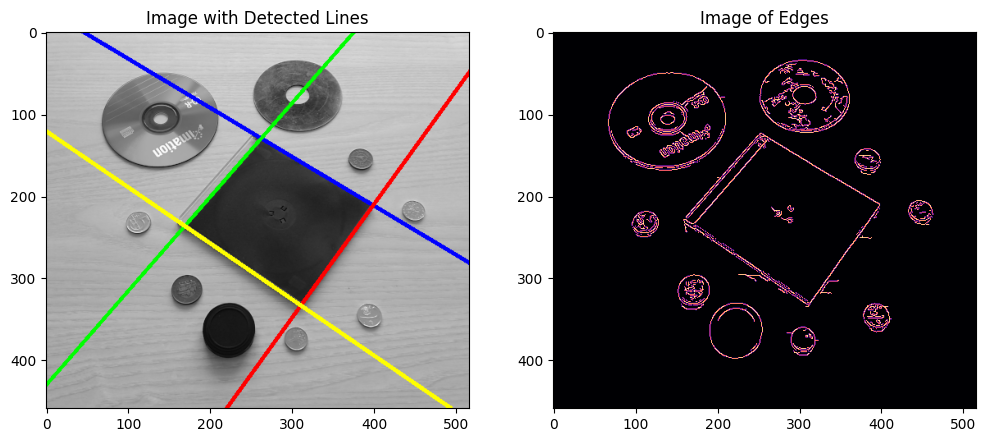

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detect_dominant_edges(image_path, num_lines=4, edge_threshold1=50, edge_threshold2=150, line_thickness=4):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Image not found.")
        return

    # Step 1: Edge detection using Canny
    edges = cv2.Canny(img, edge_threshold1, edge_threshold2)

    # Step 2: Convert edge image to a list of coordinates
    edge_points = np.column_stack(np.where(edges > 0))

    # Step 3: Prepare image for drawing lines (color version of the original image)
    img_with_lines = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Function to calculate distance from a line for RANSAC
    def line_distance(point, line_params):
        a, b, c = line_params
        x, y = point
        return abs(a * x + b * y + c) / np.sqrt(a ** 2 + b ** 2)

    # RANSAC parameters
    ransac_iterations = 2000  # Increased iterations for more robust line finding
    distance_threshold = 1.0  # Tighter distance threshold for more accurate line fitting
    detected_lines = []  # Store detected lines (each line represented by two points)
    line_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]  # Colors for lines

    # Step 4: RANSAC Line Detection
    for i in range(num_lines):
        max_inliers = 0
        best_line = None
        best_inliers = None

        for _ in range(ransac_iterations):
            # Randomly sample two points
            indices = np.random.choice(len(edge_points), 2, replace=False)
            p1, p2 = edge_points[indices[0]], edge_points[indices[1]]

            # Fit line ax + by + c = 0 between p1 and p2
            a, b = p2[1] - p1[1], p1[0] - p2[0]
            c = -a * p1[0] - b * p1[1]
            line_params = (a, b, c)

            # Find inliers
            inliers = [pt for pt in edge_points if line_distance(pt, line_params) < distance_threshold]
            if len(inliers) > max_inliers:
                max_inliers = len(inliers)
                best_line = (p1, p2)
                best_inliers = inliers

        if best_line is not None:
            # Calculate extended line endpoints to cover full image
            p1, p2 = best_line
            if p2[1] != p1[1]:  # Avoid division by zero
                slope = (p2[0] - p1[0]) / (p2[1] - p1[1])
                y1, y2 = 0, img.shape[0]
                x1 = int(p1[1] - p1[0] / slope)
                x2 = int(p2[1] + (img.shape[0] - p2[0]) / slope)
            else:
                x1, x2 = p1[1], p2[1]
                y1, y2 = 0, img.shape[0]

            # Draw the extended line with unique color
            cv2.line(img_with_lines, (x1, y1), (x2, y2), line_colors[i % len(line_colors)], line_thickness)
            detected_lines.append(best_line)

            # Remove inliers from the edge points
            inliers_array = np.array(best_inliers)
            edge_points = np.array([pt for pt in edge_points if pt.tolist() not in inliers_array.tolist()])

    # Step 5: Display Results with matplotlib
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original image with lines
    ax[0].imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image with Detected Lines')
    ax[0].axis('on')

    # Edge-only image
    ax[1].imshow(edges, cmap='magma')
    ax[1].set_title('Image of Edges')
    ax[1].axis('on')

    plt.show()

detect_dominant_edges("/content/drive/MyDrive/3DCV/cd_box.png")